In [103]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
#Loading data

data = pd.read_csv("AmesHousing.csv")
data

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0      NaN       IR1          Lvl    AllPub     Corner        Gtl   
1      NaN       Reg          Lvl    AllPub     Inside        Gtl   
2      NaN       IR1          Lvl    AllPub     Corner        Gtl   
3      NaN       Reg          Lvl    AllPub     Corner        Gtl   
4      NaN       IR1          Lvl    AllPub     Inside        Gtl   
...    ...       ...          ...       ...        ...        ...   
2925   NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2926   NaN       IR1          Low    AllPub     Inside        Mod   
2927   NaN       Reg          Lvl    AllPub     Inside        Gtl   
2928   NaN       Reg          Lvl    AllPub     Inside        Mod   
2929   NaN       Reg          Lvl    AllPub     Inside        Mod   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0           NAmes        Norm        Norm      1Fam      1Story             6   
1           NAmes       Feedr        Norm      1Fam      1Story             5   
2           NAmes        Norm        Norm      1Fam      1Story             6   
3           NAmes        Norm        Norm      1Fam      1Story             7   
4         Gilbert        Norm        Norm      1Fam      2Story             5   
...           ...         ...         ...       ...         ...           ...   
2925      Mitchel        Norm        Norm      1Fam        SLvl             6   
2926      Mitchel        Norm        Norm      1Fam      1Story             5   
2927      Mitchel        Norm        Norm      1Fam      SFoyer             5   
2928      Mitchel        Norm        Norm      1Fam      1Story             5   
2929      Mitchel        Norm        Norm      1Fam      2Story             7   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
0                5        1960            1960        Hip   CompShg   
1                6        1961            1961      Gable   CompShg   
2                6        1958            1958        Hip   CompShg   
3                5        1968            1968        Hip   CompShg   
4                5        1997            1998      Gable   CompShg   
...            ...         ...             ...        ...       ...   
2925             6        1984            1984      Gable   CompShg   
2926             5        1983            1983      Gable   CompShg   
2927             5        1992            1992      Gable   CompShg   
2928             5        1974            1975      Gable   CompShg   
2929             5        1993            1994      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0         BrkFace      Plywood        Stone         112.0         TA   
1         VinylSd      VinylSd          NaN           0.0         TA   
2         Wd Sdng      Wd Sdng      BrkFace         108.0         TA   
3         BrkFace      BrkFace          NaN           0.0         Gd   
4         VinylSd      VinylSd

In [31]:
#Checking for missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing_values)


Missing Values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [49]:
#Handling missing values for needed columns

data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)
data['Bsmt Full Bath'] = data['Bsmt Full Bath'].fillna(0)
data['Bsmt Half Bath'] = data['Bsmt Half Bath'].fillna(0)
data['BsmtFin SF 1'] = data['BsmtFin SF 1'].fillna(0)
data['BsmtFin SF 2'] = data['BsmtFin SF 2'].fillna(0)
data['Total Bsmt SF'] = data['Total Bsmt SF'].fillna(0)
data['Bsmt Unf SF'] = data['Bsmt Unf SF'].fillna(0)
data['Garage Cars'] = data['Garage Cars'].fillna(0)
data['Garage Area'] = data['Garage Area'].fillna(0)

In [70]:
#Outliers
#Define a function to detect outliers using the IQR method

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Focus on key numerical features relevant to house prices
numerical_features = ['SalePrice', 'Lot Area', 'Lot Frontage', 'Gr Liv Area', 'Total Bsmt SF', 'Mas Vnr Area']
for feature in numerical_features:
    print(f"Outliers in {feature}: {detect_outliers(data, feature)}")

Outliers in SalePrice: 137
Outliers in Lot Area: 127
Outliers in Lot Frontage: 261
Outliers in Gr Liv Area: 75
Outliers in Total Bsmt SF: 124
Outliers in Mas Vnr Area: 0


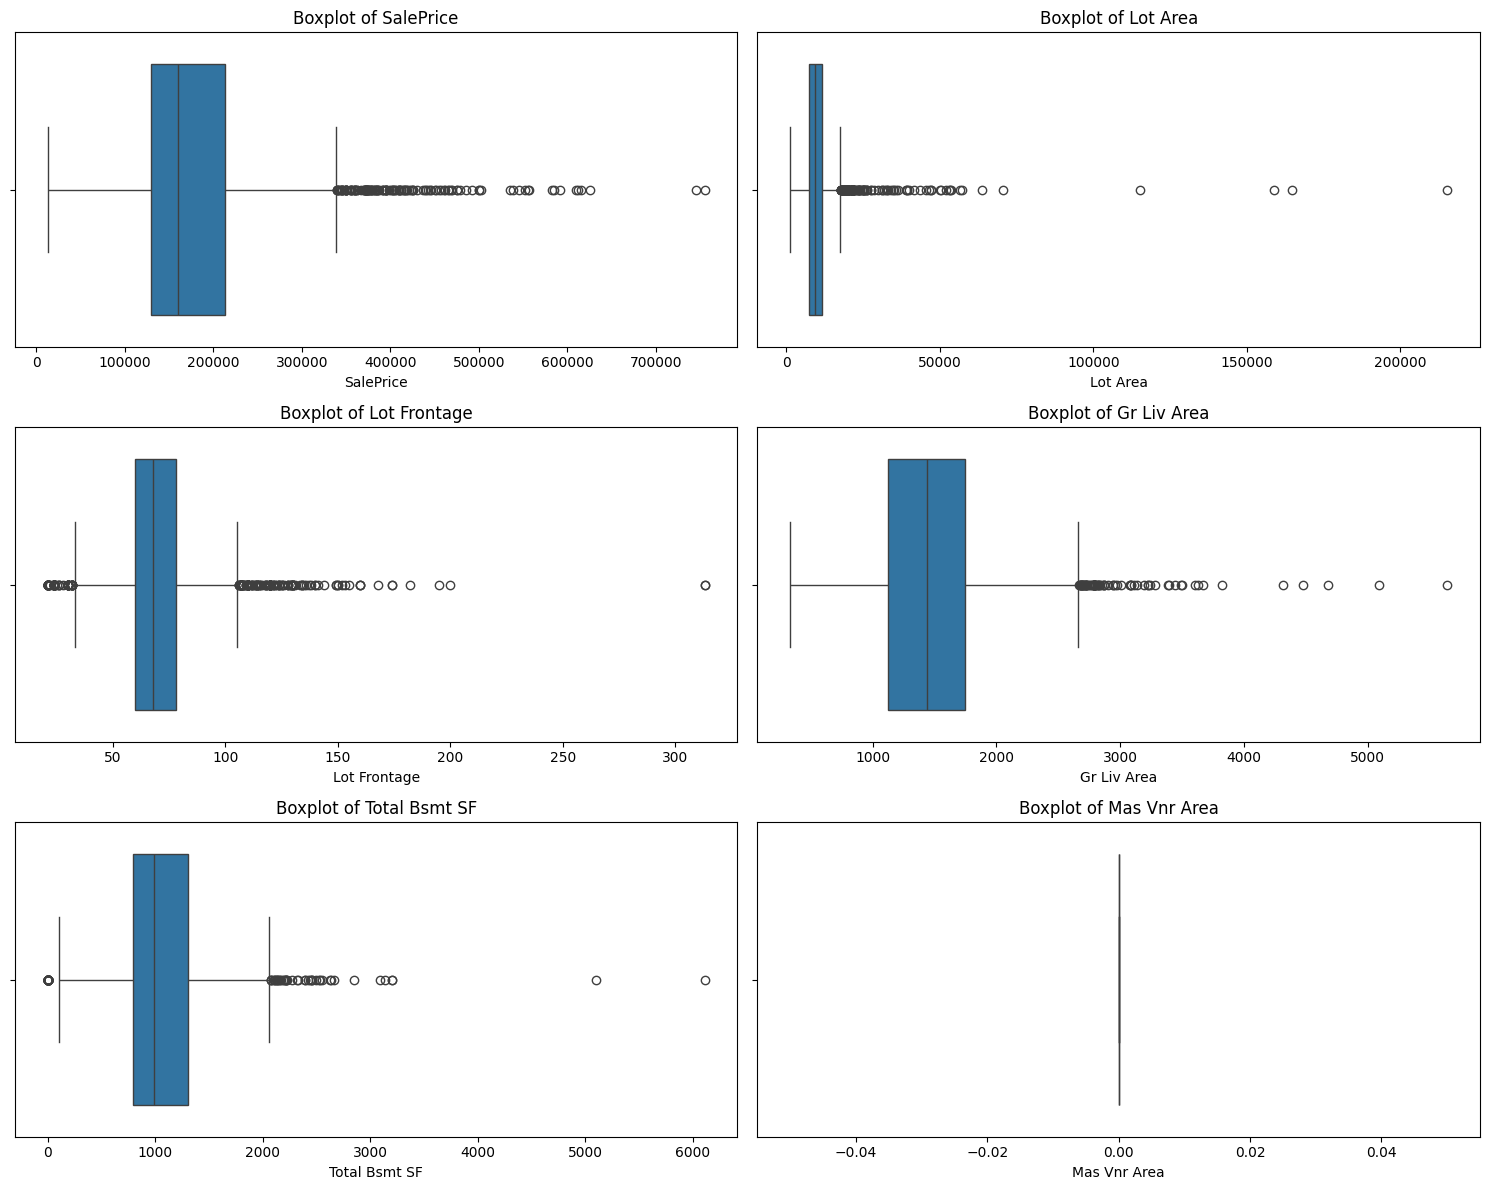

In [69]:
#Visualize outliers using boxplot
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

In [83]:
#Handle outliers
data['SalePrice'] = data['SalePrice'].clip(upper=data['SalePrice'].quantile(0.95))
data['Gr Liv Area'] = data['Gr Liv Area'].clip(upper=data['Gr Liv Area'].quantile(0.95))
data['Lot Area'] = data['Lot Area'].clip(upper=data['Lot Area'].quantile(0.95))
data['Total Bsmt SF'] = data['Total Bsmt SF'].clip(upper=data['Total Bsmt SF'].quantile(0.95))
data['Total Bsmt SF'] = data['Total Bsmt SF'].clip(lower=data['Total Bsmt SF'].quantile(0.05))


In [75]:
#Data inconsistencies
# Verify categorical columns for invalid entries
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", data[col].value_counts())

# Check numerical columns for negative or invalid values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if (data[col] < 0).any():
        print(f"\nNegative values found in {col}:\n", data[data[col] < 0][col])


Unique values in MS Zoning:
 MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

Unique values in Street:
 Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Unique values in Alley:
 Alley
Grvl    120
Pave     78
Name: count, dtype: int64

Unique values in Lot Shape:
 Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64

Unique values in Land Contour:
 Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

Unique values in Utilities:
 Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

Unique values in Lot Config:
 Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64

Unique values in Land Slope:
 Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64

Unique values in Neighborhood:
 Neighborhood
NAmes      

In [81]:
#Feature Engineering

#Selecting relevant features 
selected_features = [
    'Neighborhood', 'MS Zoning', 'Lot Frontage', 'Lot Area',  # Location
    'Gr Liv Area', 'Total Bsmt SF',  # Square footage
    'Bedroom AbvGr',  # Number of bedrooms
    'Yr Sold', 'Mo Sold', 'Sale Condition',  # Market conditions
    'Overall Qual', 'Year Built', 'Full Bath', 'Half Bath',  # Additional high-impact features
    'SalePrice'  # Target variable (kept for correlation analysis)
]
data_selected = data[selected_features]
data_selected

Neighborhood MS Zoning  Lot Frontage  Lot Area  Gr Liv Area  \
0           NAmes        RL         141.0  17126.05       1656.0   
1           NAmes        RH          80.0  11622.00        896.0   
2           NAmes        RL          81.0  14267.00       1329.0   
3           NAmes        RL          93.0  11160.00       2110.0   
4         Gilbert        RL          74.0  13830.00       1629.0   
...           ...       ...           ...       ...          ...   
2925      Mitchel        RL          37.0   7937.00       1003.0   
2926      Mitchel        RL          68.0   8885.00        902.0   
2927      Mitchel        RL          62.0  10441.00        970.0   
2928      Mitchel        RL          77.0  10010.00       1389.0   
2929      Mitchel        RL          74.0   9627.00       2000.0   

      Total Bsmt SF  Bedroom AbvGr  Yr Sold  Mo Sold Sale Condition  \
0            1080.0              3     2010        5         Normal   
1             882.0              2     2010        6         Normal   
2            1329.0              3     2010        6         Normal   
3            1776.0              3     2010        4         Normal   
4             928.0              3     2010        3         Normal   
...             ...            ...      ...      ...            ...   
2925         1003.0              3     2006        3         Normal   
2926          864.0              2     2006        6         Normal   
2927          912.0              3     2006        7         Normal   
2928         1389.0              2     2006        4         Normal   
2929          996.0              3     2006       11         Normal   

      Overall Qual  Year Built  Full Bath  Half Bath  SalePrice  
0                6        1960          1          0     215000  
1                5        1961          1          0     105000  
2                6        1958          1          1     172000  
3                7        1968          2          1     244000  
4                5        1997          2          1     189900  
...            ...         ...        ...        ...        ...  
2925             6        1984          1          0     142500  
2926             5        1983          1          0     131000  
2927             5        1992          1          0     132000  
2928             5        1974          1          0     170000  
2929             7        1993          2          1     188000  

[2930 rows x 15 columns]

In [99]:
#Creating new features

data_selected.loc[:, 'Total_SF'] = data_selected['Gr Liv Area'] + data_selected['Total Bsmt SF']  # Total square footage
data_selected.loc[:, 'House_Age'] = data_selected['Yr Sold'] - data_selected['Year Built']        # House age
data_selected.loc[:, 'Total_Bath'] = data_selected['Full Bath'] + 0.5 * data_selected['Half Bath']  # Total bathrooms
data_selected.loc[:, 'Neighborhood_Qual'] = data_selected['Neighborhood'] + '_' + data_selected['Overall Qual'].astype(str)  # Neighborhood & quality

In [112]:
data_selected

Neighborhood MS Zoning  Lot Frontage  Lot Area  Gr Liv Area  \
0           NAmes        RL         141.0  17126.05       1656.0   
1           NAmes        RH          80.0  11622.00        896.0   
2           NAmes        RL          81.0  14267.00       1329.0   
3           NAmes        RL          93.0  11160.00       2110.0   
4         Gilbert        RL          74.0  13830.00       1629.0   
...           ...       ...           ...       ...          ...   
2925      Mitchel        RL          37.0   7937.00       1003.0   
2926      Mitchel        RL          68.0   8885.00        902.0   
2927      Mitchel        RL          62.0  10441.00        970.0   
2928      Mitchel        RL          77.0  10010.00       1389.0   
2929      Mitchel        RL          74.0   9627.00       2000.0   

      Total Bsmt SF  Bedroom AbvGr  Yr Sold  Mo Sold Sale Condition  \
0            1080.0              3     2010        5         Normal   
1             882.0              2     2010        6         Normal   
2            1329.0              3     2010        6         Normal   
3            1776.0              3     2010        4         Normal   
4             928.0              3     2010        3         Normal   
...             ...            ...      ...      ...            ...   
2925         1003.0              3     2006        3         Normal   
2926          864.0              2     2006        6         Normal   
2927          912.0              3     2006        7         Normal   
2928         1389.0              2     2006        4         Normal   
2929          996.0              3     2006       11         Normal   

      Overall Qual  Year Built  Full Bath  Half Bath  SalePrice  Total_SF  \
0                6        1960          1          0     215000    2736.0   
1                5        1961          1          0     105000    1778.0   
2                6        1958          1          1     172000    2658.0   
3                7        1968          2          1     244000    3886.0   
4                5        1997          2          1     189900    2557.0   
...            ...         ...        ...        ...        ...       ...   
2925             6        1984          1          0     142500    2006.0   
2926             5        1983          1          0     131000    1766.0   
2927             5        1992          1          0     132000    1882.0   
2928             5        1974          1          0     170000    2778.0   
2929             7        1993          2          1     188000    2996.0   

      House_Age  Total_Bath Neighborhood_Qual  
0            50         1.0           NAmes_6  
1            49         1.0           NAmes_5  
2            52         1.5           NAmes_6  
3            42         2.5           NAmes_7  
4            13         2.5         Gilbert_5  
...         ...         ...               ...  
2925         22         1.0         Mitchel_6  
2926         23         1.0         Mitchel_5  
2927         14         1.0         Mitchel_5  
2928         32         1.0         Mitchel_5  
2929         13         2.5         Mitchel_7  

[2930 rows x 19 columns]

In [104]:
#Encode Categorical Features
categorical_cols = ['MS Zoning', 'Sale Condition', 'Neighborhood_Qual']
data_encoded = pd.get_dummies(data_selected, columns=categorical_cols, drop_first=True)

# Encode Overall Qual as ordinal (since it’s ordered: 1 to 10)
label_encoder = LabelEncoder()
data_encoded['Overall Qual'] = label_encoder.fit_transform(data_selected['Overall Qual'])

In [105]:
#Feature selection using correlation analysis
corr_matrix = data_encoded.select_dtypes(include=['int64', 'float64']).corr()
print("\nCorrelation with SalePrice:\n", corr_matrix['SalePrice'].sort_values(ascending=False))


Correlation with SalePrice:
 SalePrice         1.000000
Overall Qual      0.821974
Total_SF          0.820744
Gr Liv Area       0.726398
Total Bsmt SF     0.637848
Total_Bath        0.611859
Year Built        0.604045
Full Bath         0.577248
Lot Area          0.412682
Lot Frontage      0.337101
Half Bath         0.295098
Bedroom AbvGr     0.155474
Mo Sold           0.045887
Yr Sold          -0.028978
Lot_Size_Ratio   -0.186350
House_Age        -0.604387
Name: SalePrice, dtype: float64


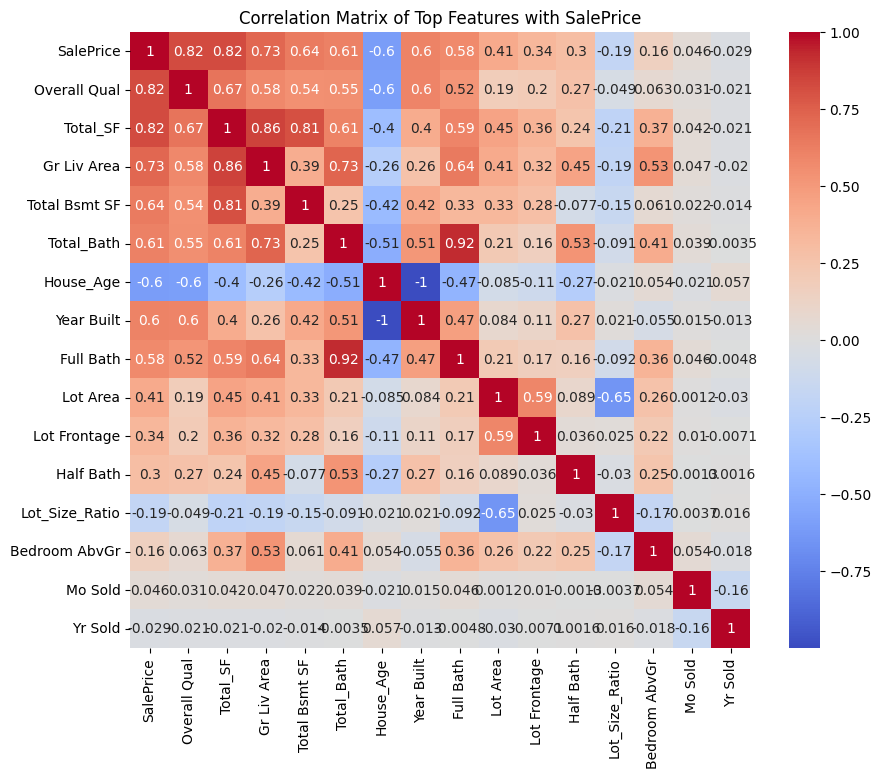

In [107]:
# Visualize correlation matrix for top features
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).index
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top Features with SalePrice')
plt.show()

In [114]:
data_encoded

Neighborhood  Lot Frontage  Lot Area  Gr Liv Area  Total Bsmt SF  \
0           NAmes         141.0  17126.05       1656.0         1080.0   
1           NAmes          80.0  11622.00        896.0          882.0   
2           NAmes          81.0  14267.00       1329.0         1329.0   
3           NAmes          93.0  11160.00       2110.0         1776.0   
4         Gilbert          74.0  13830.00       1629.0          928.0   
...           ...           ...       ...          ...            ...   
2925      Mitchel          37.0   7937.00       1003.0         1003.0   
2926      Mitchel          68.0   8885.00        902.0          864.0   
2927      Mitchel          62.0  10441.00        970.0          912.0   
2928      Mitchel          77.0  10010.00       1389.0         1389.0   
2929      Mitchel          74.0   9627.00       2000.0          996.0   

      Bedroom AbvGr  Overall Qual  Year Built  Full Bath  Half Bath  \
0                 3             5        1960          1          0   
1                 2             4        1961          1          0   
2                 3             5        1958          1          1   
3                 3             6        1968          2          1   
4                 3             4        1997          2          1   
...             ...           ...         ...        ...        ...   
2925              3             5        1984          1          0   
2926              2             4        1983          1          0   
2927              3             4        1992          1          0   
2928              2             4        1974          1          0   
2929              3             6        1993          2          1   

      SalePrice  Total_SF  House_Age  Total_Bath  MS Zoning_C (all)  \
0        215000    2736.0         50         1.0              False   
1        105000    1778.0         49         1.0              False   
2        172000    2658.0         52         1.5              False   
3        244000    3886.0         42         2.5              False   
4        189900    2557.0         13         2.5              False   
...         ...       ...        ...         ...                ...   
2925     142500    2006.0         22         1.0              False   
2926     131000    1766.0         23         1.0              False   
2927     132000    1882.0         14         1.0              False   
2928     170000    2778.0         32         1.0              False   
2929     188000    2996.0         13         2.5              False   

      MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  \
0            False              False         False          True   
1            False              False          True         False   
2            False              False         False          True   
3            False              False         False          True   
4            False              False         False          True   
...            ...                ...           ...           ...   
2925         False              False         False          True   
2926         False              False         False          True   
2927         False              False         False          True   
2928         False              False         False          True   
2929         False              False         False          True   

      MS Zoning_RM  Sale Condition_AdjLand  Sale Condition_Alloca  \
0            False                   False                  False   
1            False                   False                  False   
2            False                   False                  False   
3            False                   False                  False   
4            False                   False                  False   
...            ...                     ...                    ...   
2925         False                   False                  False   
2926         False                   Fals

In [113]:
#Dropping features with low correlation
data_encoded = data_encoded.loc[:, ~data_selected.columns.isin(['Mo Sold', 'Yr Sold'])]
data_encoded

IndexError: Boolean index has wrong length: 19 instead of 154